## **Data Augmentation**

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images. Data augmentation on images would include transformations like:

 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

2024-07-28 23:06:51.680200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# This function will plot images in the form of a grid
# with 1 row and 10 columns where images are placed in each column


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    channel_shift_range=10.0,
    horizontal_flip=True,
)

In [4]:
chosen_image = random.choice(os.listdir("data/dogs-vs-cats/train/dog"))

In [5]:
image_path = "data/dogs-vs-cats/train/dog/" + chosen_image

In [6]:
assert os.path.isfile(image_path)

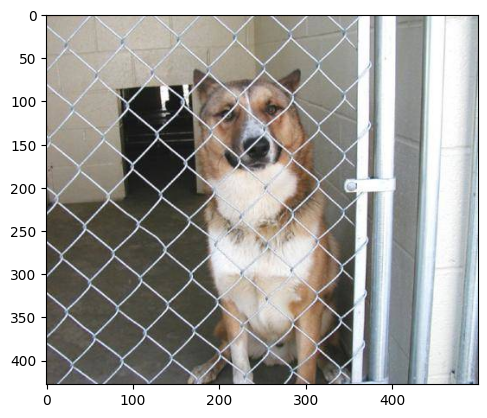

In [7]:
# Obtain image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [11]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [12]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

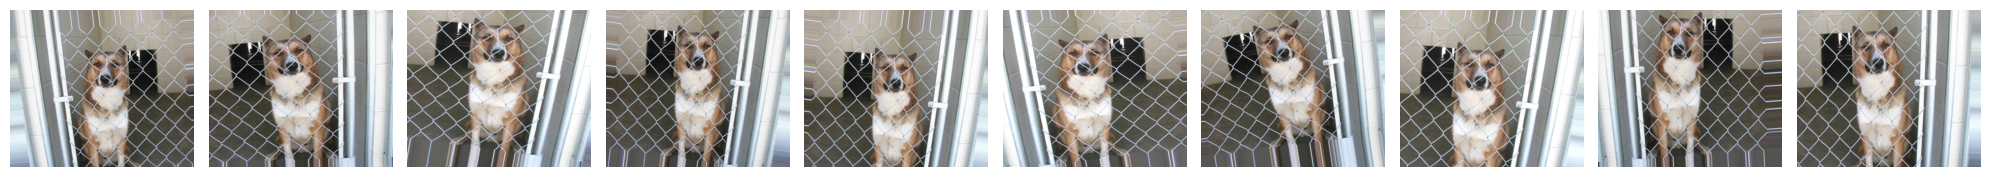

In [13]:
# Augmented images
plotImages(aug_images)